# Analysis of the text2video experiments

## Cross model comparison

In [100]:
import pandas as pd
import os

DATA_DIR = './data'
PREFIX = 'exp7_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv and 'frames' not in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df = pd.concat(dfs, ignore_index=True)
exp1_df['energy_generate_gpu'] = exp1_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df.drop(columns=['energy_generate'], inplace=True)
exp1_df['runs'] = 5
exp1_df['cpu_count'] = 8
exp1_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df['gpu_count'] = 1
exp1_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'

exp1_df = exp1_df[exp1_df['model_name'].isin(['WAN2.1-T2V-1.3B-Diffusers', 'CogVideoX-2b',
       'Mochi-1-preview', 'LTX-Video-0.9.7-dev',
       'WAN2.1-T2V-14B-Diffusers', 'CogVideoX-5b', 'AnimateDiff'])]
exp1_df

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,negative_prompt,height,width,num_frames,steps,...,decode_timestep,image_cond_noise_scale,adapter_repo,adapter_ckpt,base_model,out_gif,cpu_count,cpu_model,gpu_count,gpu_model
0,WAN2.1-T2V-1.3B-Diffusers,409.762912,0.008383,0.004326,A rainforest canopy with monkeys and exotic bi...,"Bright tones, overexposed, static, blurred det...",720.0,1280.0,81.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,WAN2.1-T2V-1.3B-Diffusers,409.217807,0.007163,0.004321,A hot air balloon festival with dozens of colo...,"Bright tones, overexposed, static, blurred det...",720.0,1280.0,81.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,CogVideoX-2b,50.702744,0.000818,0.000536,A fox running through a snowy forest.,NaN,NaN,NaN,49.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,Mochi-1-preview,263.480380,0.004586,0.002782,A knight rescuing a princess from a tower.,NaN,NaN,NaN,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,LTX-Video-0.9.7-dev,9.663269,0.000173,0.000103,"A bakery filled with pastries and bread, with ...","worst quality, inconsistent motion, blurry, ji...",512.0,704.0,121.0,NaN,...,0.05,0.025,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mochi-1-preview,263.466227,0.004581,0.002782,A deep-sea submarine exploring a glowing under...,NaN,NaN,NaN,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
331,LTX-Video-0.9.7-dev,9.666827,0.000171,0.000103,A dragon flying over a burning village.,"worst quality, inconsistent motion, blurry, ji...",512.0,704.0,121.0,NaN,...,0.05,0.025,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
332,WAN2.1-T2V-14B-Diffusers,1874.441234,0.035614,0.019787,A cozy library with a cat sleeping on a stack ...,"Bright tones, overexposed, static, blurred det...",720.0,1280.0,81.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
333,WAN2.1-T2V-1.3B-Diffusers,409.613645,0.007153,0.004325,A cowboy riding a horse across a desert with d...,"Bright tones, overexposed, static, blurred det...",720.0,1280.0,81.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [101]:
exp1_df[['name_csv', 'model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram', 'prompt']].sort_values(
    by=['model_name', 'prompt'])

,name_csv,model_name,duration_generate,energy_generate_gpu,energy_generate_cpu,energy_generate_ram,prompt
146,exp7_AnimateDiff_results_prompt18_2025-08-16_1...,AnimateDiff,0.679275,0.000115,0.000016,0.000008,"A bakery filled with pastries and bread, with ..."
100,exp7_AnimateDiff_results_prompt23_2025-08-16_1...,AnimateDiff,0.679941,0.000114,0.000016,0.000008,A ballerina dancing gracefully in an empty the...
174,exp7_AnimateDiff_results_prompt1_2025-08-16_10...,AnimateDiff,0.679339,0.000112,0.000016,0.000008,"A bustling cyberpunk street market at night, n..."
168,exp7_AnimateDiff_results_prompt43_2025-08-16_1...,AnimateDiff,0.677682,0.000115,0.000015,0.000008,A caravan of camels crossing a desert at dusk.
228,exp7_AnimateDiff_results_prompt42_2025-08-16_1...,AnimateDiff,0.678883,0.000114,0.000015,0.000008,A chef making sushi in a busy restaurant kitchen.
...,...,...,...,...,...,...,...
68,exp7_WAN2.1-T2V-14B-Diffusers_results_prompt5_...,WAN2.1-T2V-14B-Diffusers,1876.713735,0.360354,0.032648,0.019811,"A tropical rainforest waterfall, with monkeys ..."
38,exp7_WAN2.1-T2V-14B-Diffusers_results_prompt25...,WAN2.1-T2V-14B-Diffusers,1874.178582,0.359507,0.043764,0.019784,A vintage car driving through a rainy city str...
318,exp7_WAN2.1-T2V-14B-Diffusers_results_prompt37...,WAN2.1-T2V-14B-Diffusers,1871.620793,0.358878,0.031397,0.019757,A waterfall turning into glowing lava in a fan...
23,exp7_WAN2.1-T2V-14B-Diffusers_results_prompt12...,WAN2.1-T2V-14B-Diffusers,1878.026643,0.360506,0.035533,0.019825,A wizard casting a fire spell in an ancient li...


In [102]:
exp1_df['steps'] = exp1_df.apply(
    lambda row: 64 if row['model_name'] == 'Mochi-1-preview' else
    60 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    60 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    4 if row['model_name'] == 'AnimateDiff' else
    30 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['steps'],
    axis=1
)

exp1_df['height'] = exp1_df.apply(
    lambda row: 480 if row['model_name'] == 'Mochi-1-preview' else
     480 if row['model_name'] == 'CogVideoX-5b' else
     480 if row['model_name'] == 'CogVideoX-2b' else
    480 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    480 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    512 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['height'],
    axis=1
)

exp1_df['width'] = exp1_df.apply(
    lambda row: 848 if row['model_name'] == 'Mochi-1-preview' else 
     720 if row['model_name'] == 'CogVideoX-5b' else
     720 if row['model_name'] == 'CogVideoX-2b' else
    832 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    832 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    704 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['width'],
    axis=1
)

exp1_df['fps'] = exp1_df.apply(
    lambda row: 10 if row['model_name'] == 'AnimateDiff' else
    row['fps'],
    axis=1
)

exp1_df['num_frames'] = exp1_df.apply(
    lambda row: 16 if row['model_name'] == 'AnimateDiff' else
    row['num_frames'],
    axis=1
)

exp1_df['model_hf_page'] = exp1_df.apply(
    lambda row: f"https://huggingface.co/ByteDance/AnimateDiff-Lightning" if row['model_name'] == 'AnimateDiff' else
    f"https://huggingface.co/THUDM/CogVideoX-5b" if row['model_name'] == 'CogVideoX-5b' else
    f"https://huggingface.co/THUDM/CogVideoX-2b" if row['model_name'] == 'CogVideoX-2b' else
    f"https://huggingface.co/Lightricks/LTX-Video-0.9.7-dev" if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    f"https://huggingface.co/genmo/mochi-1-preview" if row['model_name'] == 'Mochi-1-preview' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    None,
    axis=1
)

In [103]:
exp1_df[['model_name', 'steps', 'height', 'width', 'num_frames', 'fps', 'model_hf_page']].drop_duplicates().sort_values(
    by=['model_name']
)

,model_name,steps,height,width,num_frames,fps,model_hf_page
15,AnimateDiff,4.0,512,512,16.0,10.0,https://huggingface.co/ByteDance/AnimateDiff-L...
2,CogVideoX-2b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-2b
13,CogVideoX-5b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-5b
4,LTX-Video-0.9.7-dev,30.0,512,704,121.0,24.0,https://huggingface.co/Lightricks/LTX-Video-0....
3,Mochi-1-preview,64.0,480,848,84.0,30.0,https://huggingface.co/genmo/mochi-1-preview
0,WAN2.1-T2V-1.3B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-...
9,WAN2.1-T2V-14B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-D...


In [104]:
# rename model_name
exp1_df['model_name'] = exp1_df['model_name'].replace({
    'WAN2.1-T2V-1.3B-Diffusers': 'WAN2.1-T2V-1.3B',
    'WAN2.1-T2V-14B-Diffusers': 'WAN2.1-T2V-14B',
})

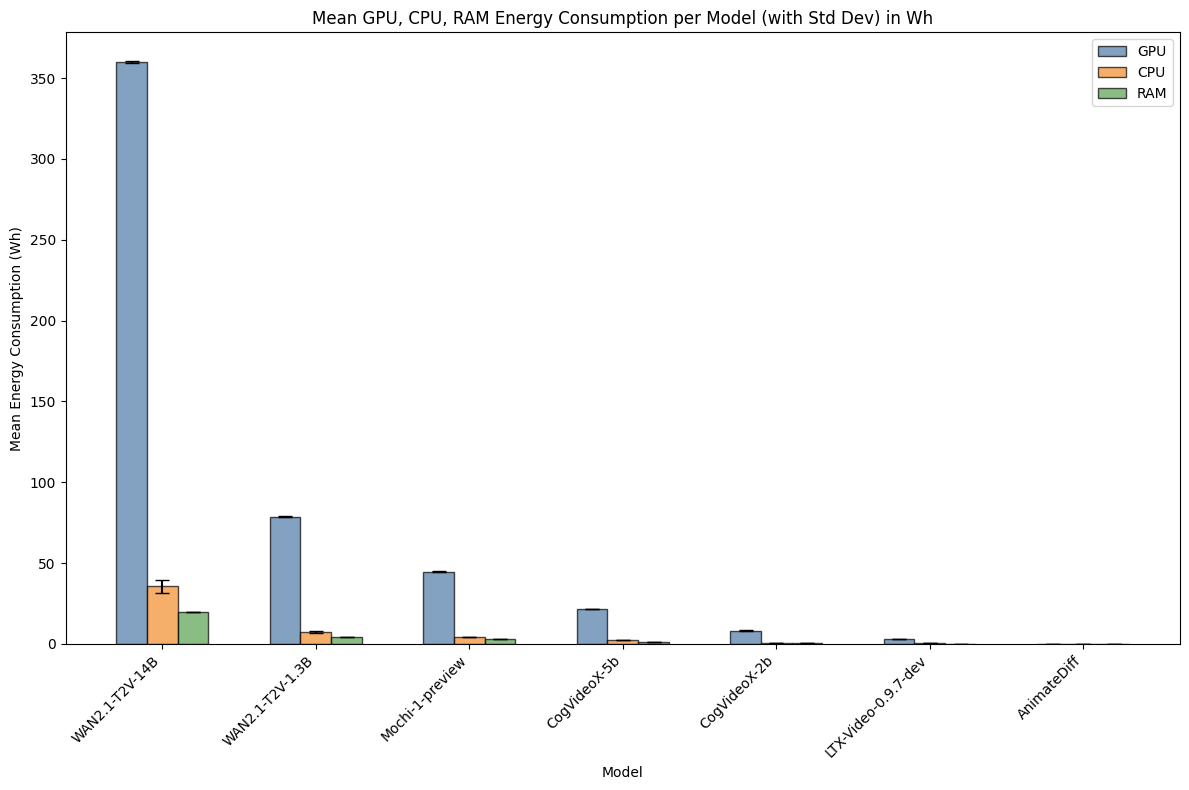

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

exp1_df_copy = exp1_df.copy()
exp1_df_copy['energy_generate_gpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_gpu'] + row['energy_upsample_gpu'] + row['energy_denoise_gpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_gpu'],
    axis=1
)
exp1_df_copy['energy_generate_cpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_cpu'] + row['energy_upsample_cpu'] + row['energy_denoise_cpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_cpu'],
    axis=1
)
exp1_df_copy['energy_generate_ram'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_ram'] + row['energy_upsample_ram'] + row['energy_denoise_ram']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_ram'],
    axis=1
)
df = exp1_df_copy[['model_name', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram']]

grouped_mean = df.groupby("model_name").mean(numeric_only=True)
grouped_std = df.groupby("model_name").std(numeric_only=True)

grouped_mean *= 1000
grouped_std *= 1000
grouped = grouped_mean.join(grouped_std, lsuffix='_mean', rsuffix='_std')
grouped = grouped.sort_values(by='energy_generate_gpu_mean', ascending=False).reset_index()

models = grouped["model_name"]
gpu_mean = grouped["energy_generate_gpu_mean"]
cpu_mean = grouped["energy_generate_cpu_mean"]
ram_mean = grouped["energy_generate_ram_mean"]

gpu_std = grouped["energy_generate_gpu_std"]
cpu_std = grouped["energy_generate_cpu_std"]
ram_std = grouped["energy_generate_ram_std"]

bar_width = 0.2
x = range(len(models))

plt.figure(figsize=(12, 8))

plt.bar([p - bar_width for p in x], gpu_mean, yerr=gpu_std, width=bar_width,
        label="GPU", color="#4E79A7", alpha=0.7, edgecolor="black", capsize=5)
plt.bar(x, cpu_mean, yerr=cpu_std, width=bar_width,
        label="CPU", color="#F28E2B", alpha=0.7, edgecolor="black", capsize=5)
plt.bar([p + bar_width for p in x], ram_mean, yerr=ram_std, width=bar_width,
        label="RAM", color="#59A14F", alpha=0.7, edgecolor="black", capsize=5)

plt.xlabel("Model")
plt.ylabel("Mean Energy Consumption (Wh)")
plt.title("Mean GPU, CPU, RAM Energy Consumption per Model (with Std Dev) in Wh")
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


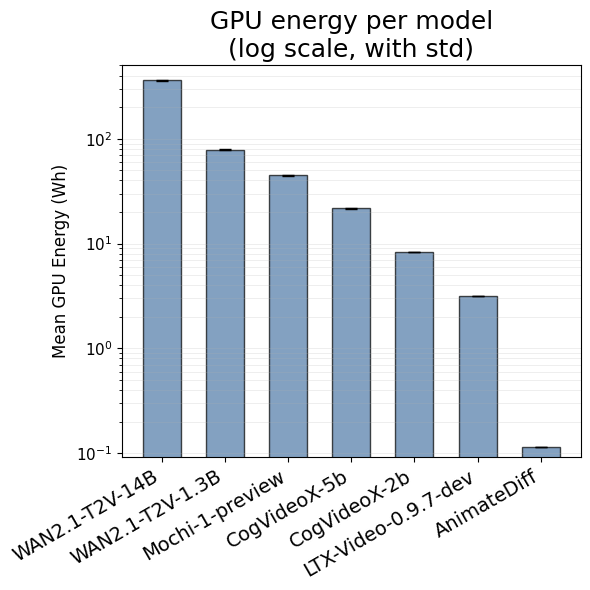

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter, LogFormatterExponent
from matplotlib.patches import Patch

models = list(models)
gpu = np.array(gpu_mean, dtype=float)
cpu = np.array(cpu_mean, dtype=float)
ram = np.array(ram_mean, dtype=float)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterMathtext, NullFormatter
from matplotlib.patches import Patch

from matplotlib.ticker import LogLocator, LogFormatterMathtext, NullFormatter

fig, ax = plt.subplots(figsize=(6, 6))
x = np.arange(len(models))

gpu_plot = np.clip(gpu, 1e-3, None)
gpu_err = np.clip(gpu_std, 1e-3, None)

ax.bar(x, gpu_plot, width=0.6, edgecolor="black", alpha=0.7, color="#4E79A7",
       yerr=gpu_err, capsize=4, ecolor="black")

ax.set_yscale("log")

ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
ax.yaxis.set_major_formatter(LogFormatterMathtext())
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1))
ax.yaxis.set_minor_formatter(NullFormatter())

ymin = gpu_plot[gpu_plot > 0].min()
ymax = gpu_plot.max()
ax.set_ylim(ymin*0.8, ymax*1.4)

ax.tick_params(axis="y", which="both", labelsize=11)
ax.set_ylabel("Mean GPU Energy (Wh)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha="right", fontsize=14)
ax.set_title("GPU energy per model\n(log scale, with std)", fontsize=18)
ax.grid(True, which="both", axis="y", linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("./results/cross_model_gpu_energy.png", dpi=300)
plt.show()


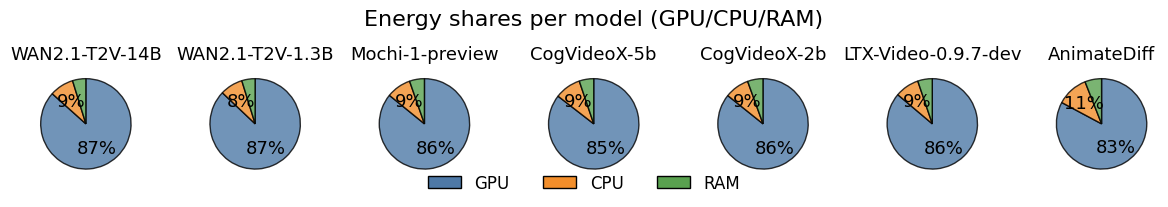

In [107]:
colors = ["#4E79A7", "#F28E2B", "#59A14F"]  # GPU, CPU, RAM
n = len(models)
cols = 3 if n <= 6 else 7
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 2))
axes = axes.flatten()

for i, m in enumerate(models):
    parts = np.array([gpu[i], cpu[i], ram[i]], dtype=float)
    total = parts.sum()
    if total <= 0:
        parts = np.array([1.0, 0.0, 0.0])
        pct_fn = None
    else:
        parts = parts / total
        pct_fn = lambda p: f"{p:.0f}%" if p >= 8 else ""
    axes[i].pie(
        parts, labels=None, autopct=pct_fn, startangle=90,
        counterclock=False, colors=colors,
        wedgeprops={"edgecolor": "black", "alpha": 0.8},
        textprops={"fontsize": 13}
    )
    axes[i].set_title(m, fontsize=13)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

handles = [Patch(facecolor=colors[0], edgecolor="black", label="GPU"),
           Patch(facecolor=colors[1], edgecolor="black", label="CPU"),
           Patch(facecolor=colors[2], edgecolor="black", label="RAM")]
fig.legend(handles=handles, loc="lower center", ncol=3, frameon=False, fontsize=12)

fig.suptitle("Energy shares per model (GPU/CPU/RAM)", y=0.98, fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("./results/cross_model_energy_shares.png", dpi=300)
plt.show()



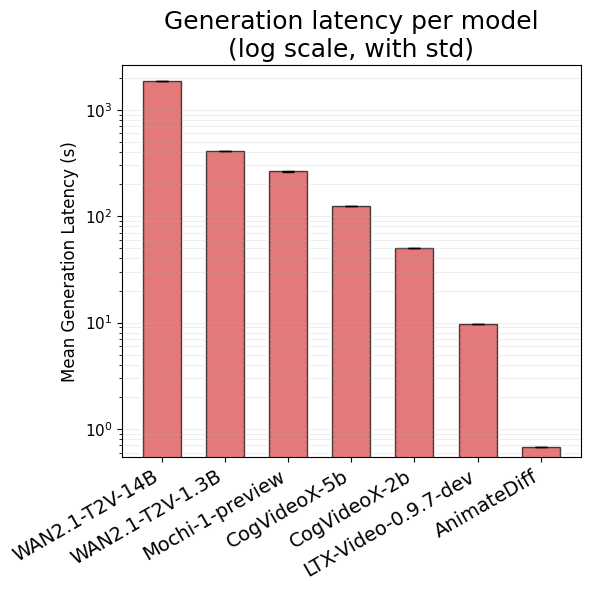

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterMathtext, NullFormatter

lat_mean = exp1_df_copy.groupby("model_name")["duration_generate"].mean()
lat_std  = exp1_df_copy.groupby("model_name")["duration_generate"].std()

lat = (
    pd.DataFrame({"duration_mean": lat_mean, "duration_std": lat_std})
      .sort_values("duration_mean", ascending=False)
      .reset_index()
)

models   = lat["model_name"].tolist()
dur_mean = lat["duration_mean"].to_numpy(dtype=float)
dur_std  = lat["duration_std"].to_numpy(dtype=float)

fig, ax = plt.subplots(figsize=(6, 6))
x = np.arange(len(models))

eps = 1e-3
dur_plot = np.clip(dur_mean, eps, None)
dur_err  = np.clip(dur_std,  eps, None)

ax.bar(x, dur_plot, width=0.6, edgecolor="black", alpha=0.7, 
       color="#D84141", yerr=dur_err, capsize=4, ecolor="black")

ax.set_yscale("log")

ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
ax.yaxis.set_major_formatter(LogFormatterMathtext())
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1))
ax.yaxis.set_minor_formatter(NullFormatter())
ymin = dur_plot[dur_plot > 0].min()
ymax = dur_plot.max()
ax.set_ylim(ymin*0.8, ymax*1.4)

ax.tick_params(axis="y", which="both", labelsize=11)
ax.set_ylabel("Mean Generation Latency (s)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha="right", fontsize=14)
ax.set_title("Generation latency per model\n(log scale, with std)", fontsize=18)
ax.grid(True, which="both", axis="y", linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("./results/cross_model_latency.png", dpi=300)
plt.show()


In [109]:
lat

,model_name,duration_mean,duration_std
0,WAN2.1-T2V-14B,1874.774814,2.121783
1,WAN2.1-T2V-1.3B,410.040181,0.527993
2,Mochi-1-preview,263.237633,0.514646
3,CogVideoX-5b,124.302810,0.366401
4,CogVideoX-2b,50.568821,0.154007
5,LTX-Video-0.9.7-dev,9.661204,0.009781
6,AnimateDiff,0.680361,0.001872


In [110]:
grouped

,model_name,energy_generate_gpu_mean,energy_generate_cpu_mean,energy_generate_ram_mean,energy_generate_gpu_std,energy_generate_cpu_std,energy_generate_ram_std
0,WAN2.1-T2V-14B,359.687778,35.746352,19.790378,0.550304,3.961212,0.022393
1,WAN2.1-T2V-1.3B,78.810856,7.373849,4.329278,0.112358,0.407022,0.005574
2,Mochi-1-preview,44.721100,4.582622,2.779697,0.201456,0.012948,0.005433
3,CogVideoX-5b,21.621625,2.354619,1.313160,0.053049,0.032188,0.003867
4,CogVideoX-2b,8.296374,0.843009,0.534857,0.025908,0.036753,0.001624
5,LTX-Video-0.9.7-dev,3.162743,0.316614,0.191256,0.006236,0.001714,0.000547
6,AnimateDiff,0.114687,0.015542,0.008255,0.000761,0.000081,0.000025


In [111]:
grouped.sort_values(by='model_name')

,model_name,energy_generate_gpu_mean,energy_generate_cpu_mean,energy_generate_ram_mean,energy_generate_gpu_std,energy_generate_cpu_std,energy_generate_ram_std
6,AnimateDiff,0.114687,0.015542,0.008255,0.000761,0.000081,0.000025
4,CogVideoX-2b,8.296374,0.843009,0.534857,0.025908,0.036753,0.001624
3,CogVideoX-5b,21.621625,2.354619,1.313160,0.053049,0.032188,0.003867
5,LTX-Video-0.9.7-dev,3.162743,0.316614,0.191256,0.006236,0.001714,0.000547
2,Mochi-1-preview,44.721100,4.582622,2.779697,0.201456,0.012948,0.005433
1,WAN2.1-T2V-1.3B,78.810856,7.373849,4.329278,0.112358,0.407022,0.005574
0,WAN2.1-T2V-14B,359.687778,35.746352,19.790378,0.550304,3.961212,0.022393


In [112]:
save_df

,model_name,duration_generate,energy_generate_gpu,energy_generate_cpu,energy_generate_ram,height,width,num_frames,fps,steps,...,energy_upsample_ram,energy_denoise_ram,upsample_model_name,downscaled_height,downscaled_width,generate_steps,denoise_steps,denoise_strength,decode_timestep,image_cond_noise_scale
0,AnimateDiff,0.679275,0.000115,0.000016,0.000008,512,512,16.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AnimateDiff,0.679941,0.000114,0.000016,0.000008,512,512,16.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AnimateDiff,0.679339,0.000112,0.000016,0.000008,512,512,16.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AnimateDiff,0.677682,0.000115,0.000015,0.000008,512,512,16.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AnimateDiff,0.678883,0.000114,0.000015,0.000008,512,512,16.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,WAN2.1-T2V-14B,1876.713735,0.360354,0.032648,0.019811,480,832,81.0,15.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,WAN2.1-T2V-14B,1874.178582,0.359507,0.043764,0.019784,480,832,81.0,15.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,WAN2.1-T2V-14B,1871.620793,0.358878,0.031397,0.019757,480,832,81.0,15.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,WAN2.1-T2V-14B,1878.026643,0.360506,0.035533,0.019825,480,832,81.0,15.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
save_df = exp1_df[['model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu',
       'energy_generate_ram', 'height', 'width', 'num_frames', 'fps', 'steps', 'prompt', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model',  'runs', 'warmup', 'model_hf_page', 
       'guidance_scale', 'negative_prompt', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'duration_upsample',
       'duration_denoise', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale' ]]
save_df = save_df.sort_values(by=['model_name', 'prompt']).reset_index(drop=True)
SAVE_DIR = '.'
save_df.to_csv(os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'), index=False)

In [ ]:
from huggingface_hub import HfApi, HfFolder
import os
from dotenv import load_dotenv
load_dotenv('.env')
TOKEN = os.getenv("HF_TOKEN")

api = HfApi()
repo_id = "VideoKilledEnergyBudget/text2video-energy-benchmark"

api.create_repo(repo_id, repo_type="dataset", exist_ok=True, token=TOKEN)

api.upload_file(
    path_or_fileobj=os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'),
    path_in_repo='text2video_energy_benchmark.csv',
    repo_id=repo_id,
    repo_type='dataset',
    token=TOKEN
)


CommitInfo(commit_url='https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-energy-benchmark/commit/0bcd65003b95eefbf80ce98b83c47c75464a164c', commit_message='Upload text2video_energy_benchmark.csv with huggingface_hub', commit_description='', oid='0bcd65003b95eefbf80ce98b83c47c75464a164c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-energy-benchmark', endpoint='https://huggingface.co', repo_type='dataset', repo_id='VideoKilledEnergyBudget/text2video-energy-benchmark'), pr_revision=None, pr_num=None)

## Push to hub video dataset

In [40]:
video_df = exp1_df.copy()

In [41]:
video_df['out_video'] = video_df.apply(
    lambda row: f"./data/text2video_dataset_cross_model/{row['out_video']}" if pd.notnull(row['out_video']) else f"./data/text2video_dataset_cross_model/{row['out_gif']}",
    axis=1
)

In [ ]:
import os
import shutil

source_dir = "./data/"
target_dir = "./data/text2video_dataset_cross_model"
os.makedirs(target_dir, exist_ok=True)

copied_files = []

for filename in os.listdir(source_dir):
    if (filename.startswith("exp7") and (filename.endswith(".mp4") or filename.endswith(".gif"))) and 'frame' not in filename:
        src = os.path.join(source_dir, filename)
        dst = os.path.join(target_dir, filename)
        shutil.copy2(src, dst)
        copied_files.append(filename)

print(f"Copied {len(copied_files)} files to {target_dir}")

Copied 435 files to ./data/text2video_dataset_cross_model


In [21]:
video_df.columns

Index(['model_name', 'duration_generate', 'energy_generate_cpu',
       'energy_generate_ram', 'prompt', 'negative_prompt', 'height', 'width',
       'num_frames', 'steps', 'guidance_scale', 'runs', 'out_video', 'out_csv',
       'fps', 'warmup', 'output_path', 'name_csv', 'duration_upsample',
       'duration_denoise', 'energy_generate_gpu', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale', 'adapter_repo', 'adapter_ckpt', 'base_model',
       'out_gif', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model'],
      dtype='object')

In [45]:
video_df.model_name.unique()

array(['WAN2.1-T2V-1.3B', 'CogVideoX-2b', 'Mochi-1-preview',
       'LTX-Video-0.9.7-dev', 'WAN2.1-T2V-14B', 'CogVideoX-5b',
       'AnimateDiff'], dtype=object)

In [69]:
df = video_df[['model_name', 'out_video']]

df['out_video'] = df['out_video'].apply(lambda x: os.path.basename(x))

df.to_csv(f'{target_dir}/metadata.csv', index=False)


/tmp/ipykernel_1967114/2467398609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['out_video'] = df['out_video'].apply(lambda x: os.path.basename(x))


In [70]:
df

,model_name,out_video
0,WAN2.1-T2V-1.3B,exp7_WAN2.1-T2V-1.3B-Diffusers_output_prompt45...
1,WAN2.1-T2V-1.3B,exp7_WAN2.1-T2V-1.3B-Diffusers_output_prompt30...
2,CogVideoX-2b,exp7_CogVideoX-2b_output_prompt41_2025-08-16_1...
3,Mochi-1-preview,exp7_Mochi-1-preview_output_prompt35_2025-08-1...
4,LTX-Video-0.9.7-dev,exp7_LTX-Video-0.9.7-dev_output_prompt18_2025-...
...,...,...
330,Mochi-1-preview,exp7_Mochi-1-preview_output_prompt24_2025-08-1...
331,LTX-Video-0.9.7-dev,exp7_LTX-Video-0.9.7-dev_output_prompt26_2025-...
332,WAN2.1-T2V-14B,exp7_WAN2.1-T2V-14B-Diffusers_output_prompt32_...
333,WAN2.1-T2V-1.3B,exp7_WAN2.1-T2V-1.3B-Diffusers_output_prompt19...


In [ ]:
from huggingface_hub import HfApi
os.getenv("HF_TOKEN")
api = HfApi()
REPO = "VideoKilledEnergyBudget/text2video-energy-benchmark-cross-model"

api.create_repo(REPO, repo_type="dataset", exist_ok=True, token=TOKEN)

api.upload_folder(
    folder_path="./data/text2video_dataset_cross_model",
    repo_id=REPO,
    repo_type="dataset",
    token=TOKEN
)


It seems you are trying to upload a large folder at once. This might take some time and then fail if the folder is too large. For such cases, it is recommended to upload in smaller batches or to use `HfApi().upload_large_folder(...)`/`huggingface-cli upload-large-folder` instead. For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#upload-a-large-folder.


CommitInfo(commit_url='https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-energy-benchmark-cross-model/commit/2595ca77aa7636649a404d2b56fcf1ba36fc0ed9', commit_message='Upload folder using huggingface_hub', commit_description='', oid='2595ca77aa7636649a404d2b56fcf1ba36fc0ed9', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-energy-benchmark-cross-model', endpoint='https://huggingface.co', repo_type='dataset', repo_id='VideoKilledEnergyBudget/text2video-energy-benchmark-cross-model'), pr_revision=None, pr_num=None)

In [72]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("VideoKilledEnergyBudget/text2video-energy-benchmark-cross-model")
ds

Generating validation split: 49 examples [00:00, 2239.84 examples/s]


DatasetDict({
    validation: Dataset({
        features: ['video'],
        num_rows: 49
    })
})

## WAN2.1 T2V-1.3B Frames

In [114]:
import pandas as pd
import os

DATA_DIR = './data'
PREFIX = 'exp7_frames'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp7_df = pd.concat(dfs, ignore_index=True)
exp7_df['energy_generate_gpu'] = exp7_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp7_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp7_df['runs'] = 5
exp7_df['cpu_count'] = 8
exp7_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp7_df['gpu_count'] = 1
exp7_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'


In [13]:
exp7_df[['num_frames', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,num_frames,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,78,385.989698,0.006154,0.071075,0.004077
1,92,520.318363,0.008305,0.097799,0.005495
2,90,482.953189,0.007727,0.090701,0.005101
3,81,417.314658,0.006618,0.077150,0.004408
4,83,416.843492,0.006668,0.077307,0.004403
...,...,...,...,...,...
95,19,42.620712,0.000579,0.007998,0.000453
96,20,55.946272,0.000765,0.010299,0.000593
97,52,212.544616,0.002660,0.037390,0.002246
98,2,6.396755,0.000083,0.001100,0.000070


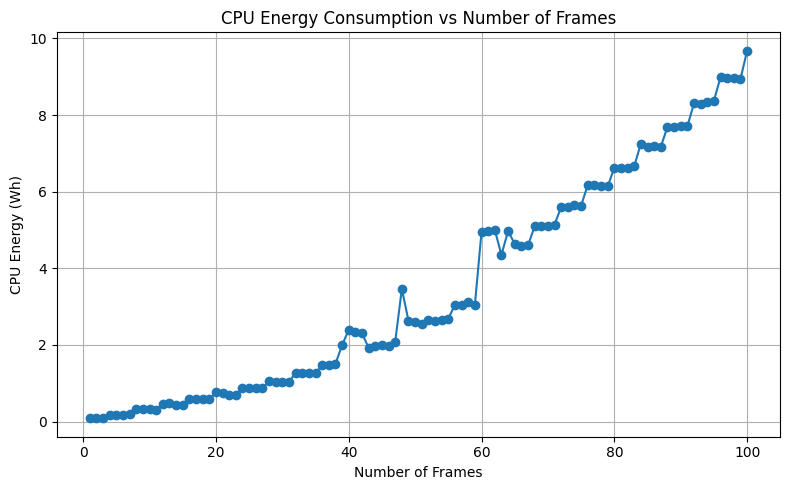

In [ ]:
import matplotlib.pyplot as plt

exp7_df_sorted = exp7_df.sort_values(by='num_frames')
plt.figure(figsize=(8, 5))
plt.plot(
    exp7_df_sorted['num_frames'],
    exp7_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


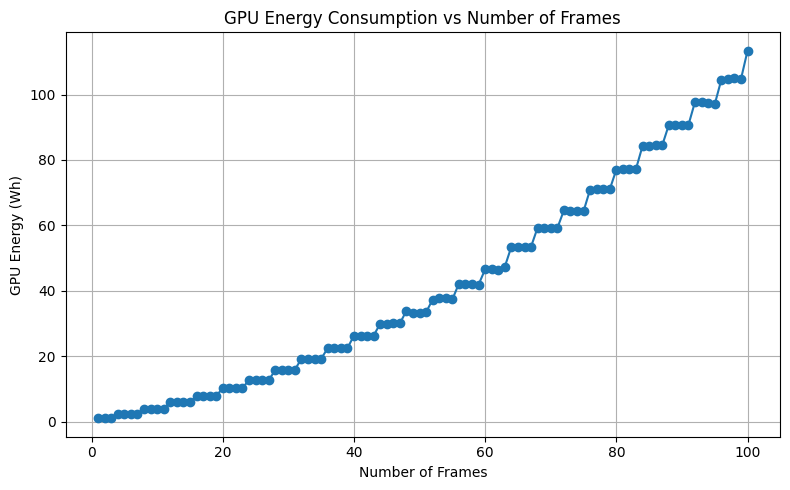

In [ ]:
import matplotlib.pyplot as plt

exp7_df_sorted = exp7_df.sort_values(by='num_frames')

plt.figure(figsize=(8, 5))
plt.plot(
    exp7_df_sorted['num_frames'],
    exp7_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


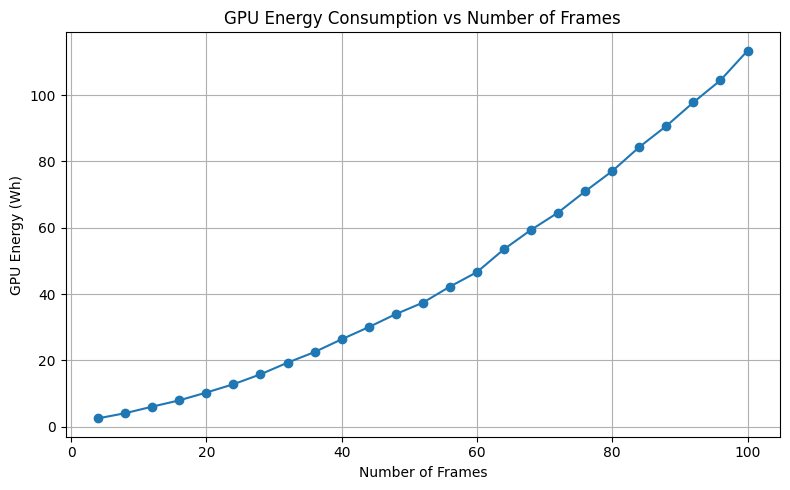

In [ ]:
import matplotlib.pyplot as plt

filtered_df = exp7_df[exp7_df['num_frames'] % 4 == 0].sort_values(by='num_frames')

plt.figure(figsize=(8, 5))
plt.plot(
    filtered_df['num_frames'],
    filtered_df['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


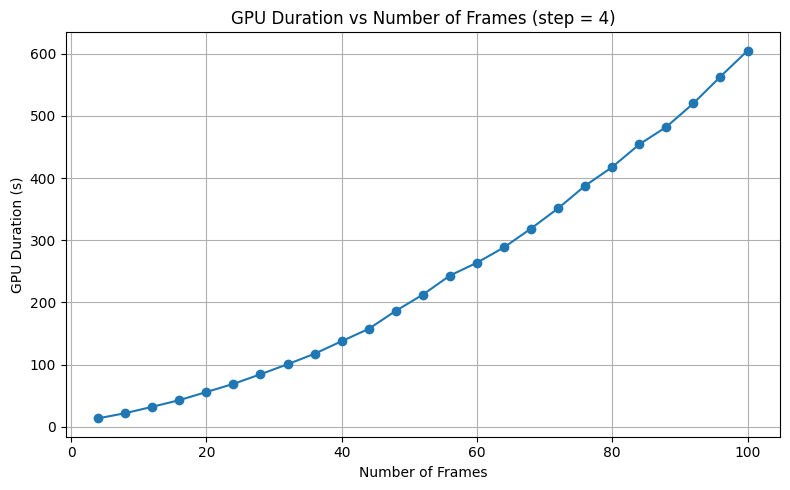

In [ ]:
import matplotlib.pyplot as plt

filtered_df = exp7_df[exp7_df['num_frames'] % 4 == 0].sort_values(by='num_frames')

plt.figure(figsize=(8, 5))
plt.plot(
    filtered_df['num_frames'],
    filtered_df['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("GPU Duration vs Number of Frames (step = 4)")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
exp7_df.describe()

,duration_generate,energy_generate_cpu,energy_generate_ram,height,width,num_frames,steps,guidance_scale,runs,fps,warmup,energy_generate_gpu,cpu_count,gpu_count
count,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
mean,227.249913,0.003502,0.002401,720.0,1280.0,50.500000,50.0,5.0,5.0,15.0,1.0,0.041992,8.0,1.0
std,174.803827,0.002869,0.001845,0.0,0.0,29.011492,0.0,0.0,0.0,0.0,0.0,0.032477,0.0,0.0
min,6.395071,0.000083,0.000070,720.0,1280.0,1.000000,50.0,5.0,5.0,15.0,1.0,0.001100,8.0,1.0
25%,69.174835,0.000868,0.000733,720.0,1280.0,25.750000,50.0,5.0,5.0,15.0,1.0,0.012777,8.0,1.0
50%,190.697655,0.002628,0.002016,720.0,1280.0,50.500000,50.0,5.0,5.0,15.0,1.0,0.033732,8.0,1.0
75%,361.727500,0.005765,0.003821,720.0,1280.0,75.250000,50.0,5.0,5.0,15.0,1.0,0.066179,8.0,1.0
max,605.015955,0.009681,0.006389,720.0,1280.0,100.000000,50.0,5.0,5.0,15.0,1.0,0.113375,8.0,1.0


## WAN2.1 T2V-1.3B Res

In [115]:
import pandas as pd
import os

DATA_DIR = './data'
PREFIX = 'exp8_res'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp8_df = pd.concat(dfs, ignore_index=True)
exp8_df['energy_generate_gpu'] = exp8_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp8_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp8_df['runs'] = 5
exp8_df['cpu_count'] = 8
exp8_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp8_df['gpu_count'] = 1
exp8_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'

In [19]:
exp8_df.columns

Index(['model_name', 'duration_generate', 'energy_generate_cpu',
       'energy_generate_ram', 'prompt', 'negative_prompt', 'height', 'width',
       'num_frames', 'steps', 'guidance_scale', 'runs', 'out_video', 'out_csv',
       'fps', 'warmup', 'output_path', 'name_csv', 'energy_generate_gpu',
       'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model'],
      dtype='object')

In [20]:
exp8_df[['width', 'height', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,width,height,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,768,432,76.053168,0.000956,0.014550,0.000805
1,704,384,55.934643,0.000721,0.010674,0.000593
2,384,384,25.149334,0.000326,0.004718,0.000268
3,1088,608,225.638278,0.004332,0.043061,0.002384
4,448,256,18.531926,0.000242,0.003380,0.000198
5,256,256,9.857111,0.000133,0.001646,0.000107
6,832,480,100.248483,0.001258,0.019198,0.001061
7,576,320,33.336573,0.000437,0.006333,0.000355
8,320,240,11.932699,0.000159,0.002045,0.000129
9,512,512,53.908905,0.000705,0.010288,0.000572


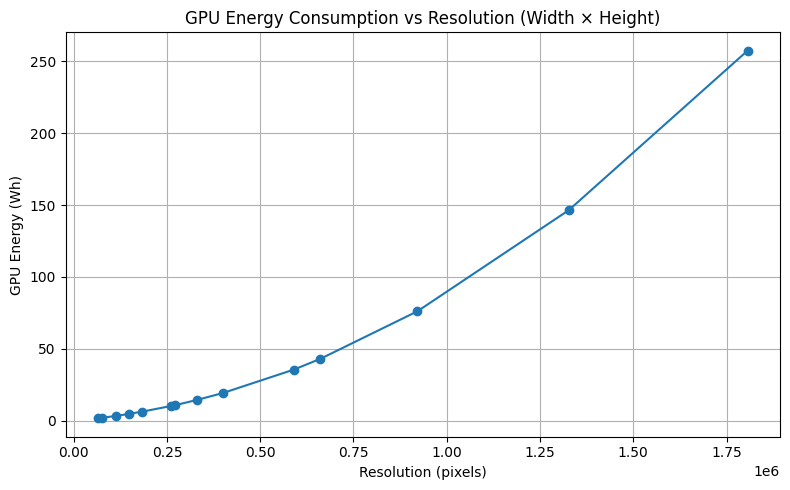

In [ ]:
import matplotlib.pyplot as plt

exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

exp8_df_sorted = exp8_df.sort_values(by='resolution')
plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


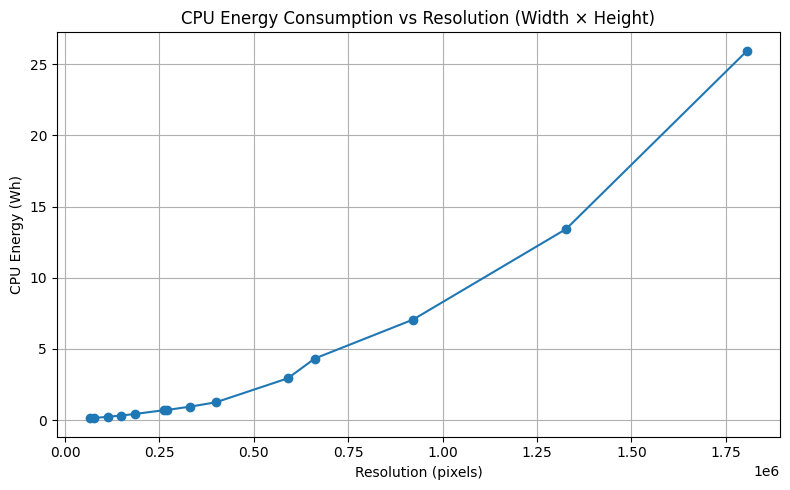

In [ ]:
import matplotlib.pyplot as plt

exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

exp8_df_sorted = exp8_df.sort_values(by='resolution')

plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


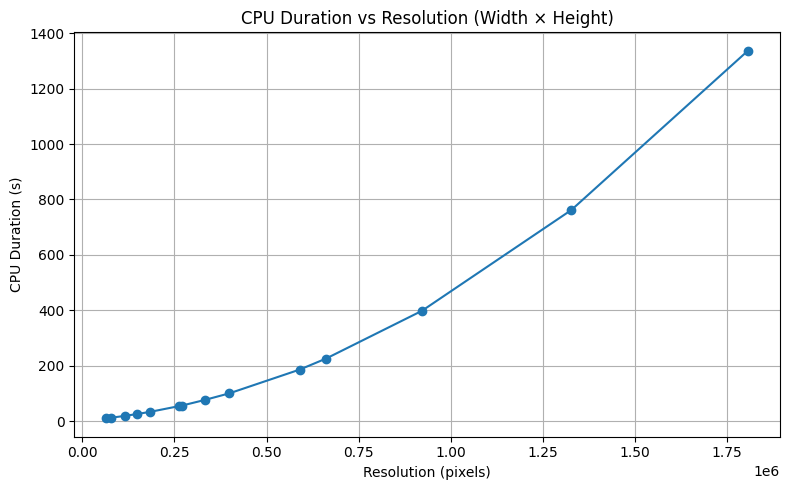

: 

In [ ]:
import matplotlib.pyplot as plt

exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

exp8_df_sorted = exp8_df.sort_values(by='resolution')

plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("Generation Duration vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("Generation Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
exp8_df_sorted.describe()

,duration_generate,energy_generate_cpu,energy_generate_ram,height,width,num_frames,steps,guidance_scale,runs,fps,warmup,energy_generate_gpu,cpu_count,gpu_count,resolution
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.0,14.0,14.0,14.000000,14.0,14.0,1.400000e+01
mean,235.194965,0.004188,0.002485,502.857143,822.857143,81.0,50.0,5.0,5.0,15.0,1.0,0.045093,8.0,1.0,5.113417e+05
std,378.309805,0.007277,0.003993,233.277272,468.191752,0.0,0.0,0.0,0.0,0.0,0.0,0.072846,0.0,0.0,5.180381e+05
min,9.857111,0.000133,0.000107,240.000000,256.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.001646,8.0,1.0,6.553600e+04
25%,27.196144,0.000354,0.000290,336.000000,464.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.005121,8.0,1.0,1.566720e+05
50%,65.993905,0.000838,0.000699,456.000000,736.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.012612,8.0,1.0,3.010560e+05
75%,215.676055,0.003984,0.002279,600.000000,1072.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.041176,8.0,1.0,6.435840e+05
max,1336.692796,0.025935,0.014112,1008.000000,1792.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.257332,8.0,1.0,1.806336e+06


## WAN2.1 T2V-1.3B Steps

In [116]:
import pandas as pd
import os

DATA_DIR = './data'
PREFIX = 'exp10_steps'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp9_df = pd.concat(dfs, ignore_index=True)
exp9_df['energy_generate_gpu'] = exp9_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp9_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp9_df['runs'] = 5
exp9_df['cpu_count'] = 8
exp9_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp9_df['gpu_count'] = 1
exp9_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'

In [13]:
exp9_df[['steps', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,steps,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,160,574.921832,0.009498,0.110134,0.006070
1,154,553.101145,0.010609,0.105941,0.005840
2,171,611.108748,0.011708,0.117125,0.006452
3,3,15.438905,0.000275,0.002926,0.000165
4,50,183.657414,0.003227,0.035133,0.001940
...,...,...,...,...,...
185,150,538.933063,0.010338,0.103241,0.005691
186,158,567.859900,0.009017,0.108770,0.005996
187,138,496.358821,0.009547,0.095076,0.005241
188,113,407.600940,0.007192,0.078072,0.004304


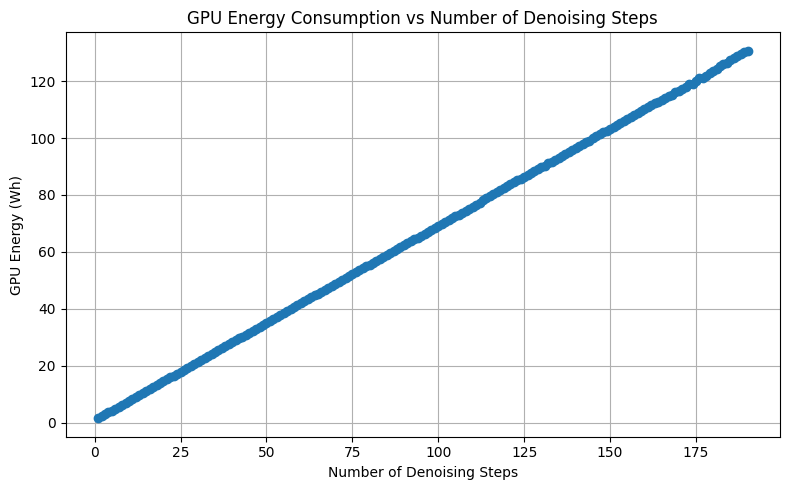

In [ ]:
import matplotlib.pyplot as plt

exp9_df_sorted = exp9_df.sort_values(by='steps')

plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


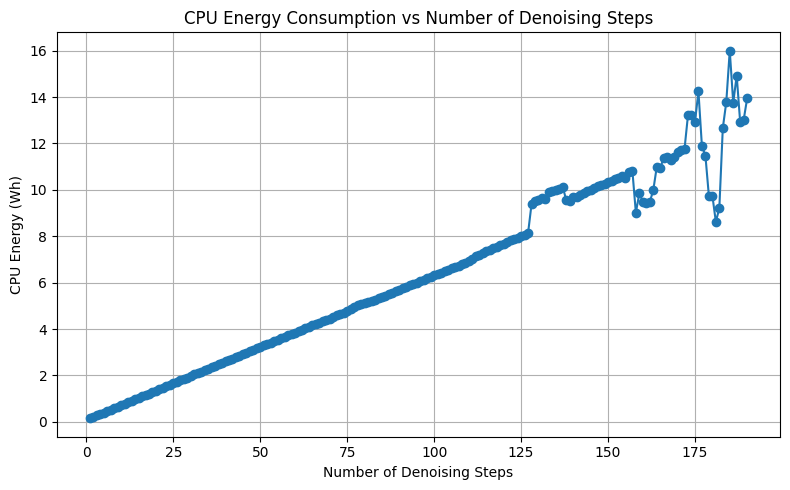

In [ ]:
import matplotlib.pyplot as plt

exp9_df_sorted = exp9_df.sort_values(by='steps')

plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


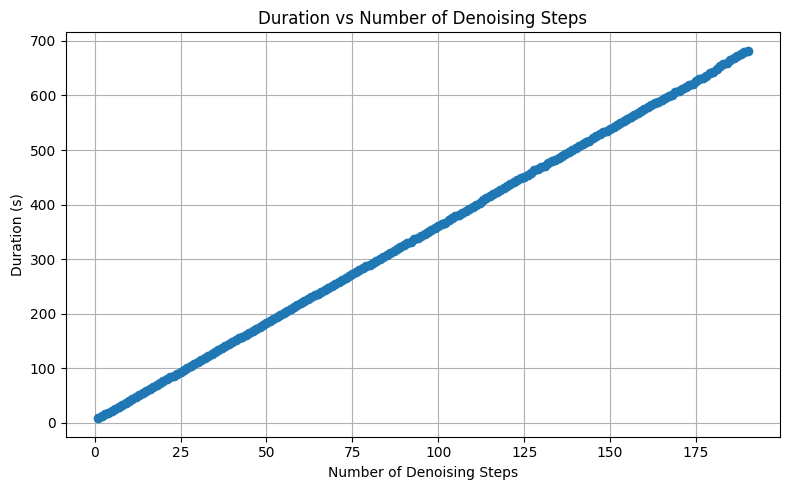

In [ ]:
import matplotlib.pyplot as plt

exp9_df_sorted = exp9_df.sort_values(by='steps')

plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("Duration vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Push to hub step, frames, res dataset

In [94]:
df_wan = pd.concat([exp7_df, exp8_df, exp9_df], ignore_index=True)
df_wan.rename(columns={'model_name': 'parameter'}, inplace=True)
df_wan['model_name'] = 'WAN2.1-T2V-1.3B'
df_wan
df_wan.to_csv('./data/exp_wan_all.csv', index=False)

In [97]:
from dotenv import load_dotenv
load_dotenv('.env')
TOKEN = os.getenv("HF_TOKEN")


In [ ]:
from huggingface_hub import HfApi, HfFolder
import os

api = HfApi()
repo_id = "VideoKilledEnergyBudget/text2video-wan-energy-benchmark"

api.create_repo(repo_id, repo_type="dataset", exist_ok=True, token=TOKEN)

api.upload_file(
    path_or_fileobj=os.path.join('data', 'exp_wan_all.csv'),
    path_in_repo='exp_wan_all.csv',
    repo_id=repo_id,
    repo_type='dataset',
    token=TOKEN
)

CommitInfo(commit_url='https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-wan-energy-benchmark/commit/eee67b3e952e2be951bc28185cdf0291012aa296', commit_message='Upload exp_wan_all.csv with huggingface_hub', commit_description='', oid='eee67b3e952e2be951bc28185cdf0291012aa296', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/VideoKilledEnergyBudget/text2video-wan-energy-benchmark', endpoint='https://huggingface.co', repo_type='dataset', repo_id='VideoKilledEnergyBudget/text2video-wan-energy-benchmark'), pr_revision=None, pr_num=None)

## Theorical calculations

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt

# =========================
# ======= PARAMS ==========
# =========================
# Base video/latent settings
T0 = 81             # frames (total, sans compter le "1 +" séparément ici)
H0, W0 = 480, 832   # base resolution
N = 32              # number of DiT layers
S0 = 50             # base denoising steps
m_text = 512      # longueur de contexte texte WanModel par défaut
d = 2048          # dim (WanModel default)

# DiT / tokenization params
f_mlp = 4           # MLP expansion (≈4)
vae_stride_t = 4    # VAE temporal stride
vae_stride_s = 8    # VAE spatial stride (H et W)
patch_h, patch_w = 2, 2  # patch spatial appliqué aux latents avant DiT (1 si pas de patch)
g = 2              # passes in th DiT cond and uncond

# timestep embedding MLP
d_tau = 256         # dim de l'embedding des timesteps

# VAE architecture defaults (Wan-VAE) for exact FLOPs
Z_DIM = 16   # latent channels
BASE = 96    # base width (dim)
# temperal_downsample encodeur: [False, True, True] => stride t=4 total, s=8 total (déjà pris en compte)
# temperal_upsample décodeur:  [True, True, False]

# Option: si tu veux forcer une version agrégée (K*T*H*W), mets USE_EXACT_VAE=False
USE_EXACT_VAE = True
# Valeurs placeholder (non utilisées si USE_EXACT_VAE=True)
K_enc = 2.0e9
K_dec = 2.0e9

# Hardware / mapping
theta_peak = 989e12  # FLOPs/s (H100 FP8 peak approx)
mu_eff = 0.456          # effective utilization
P_max = 700.0          # Watts
latency_overhead = 0.0
energy_overhead = 0.0

# Ranges for plots
S_values = np.arange(1, 200, 4)          # vary S
scale_values = np.linspace(0.5, 2.0, 40) # vary (H,W) by a scale factor
T_values = np.arange(4, 100, 2)          # vary T


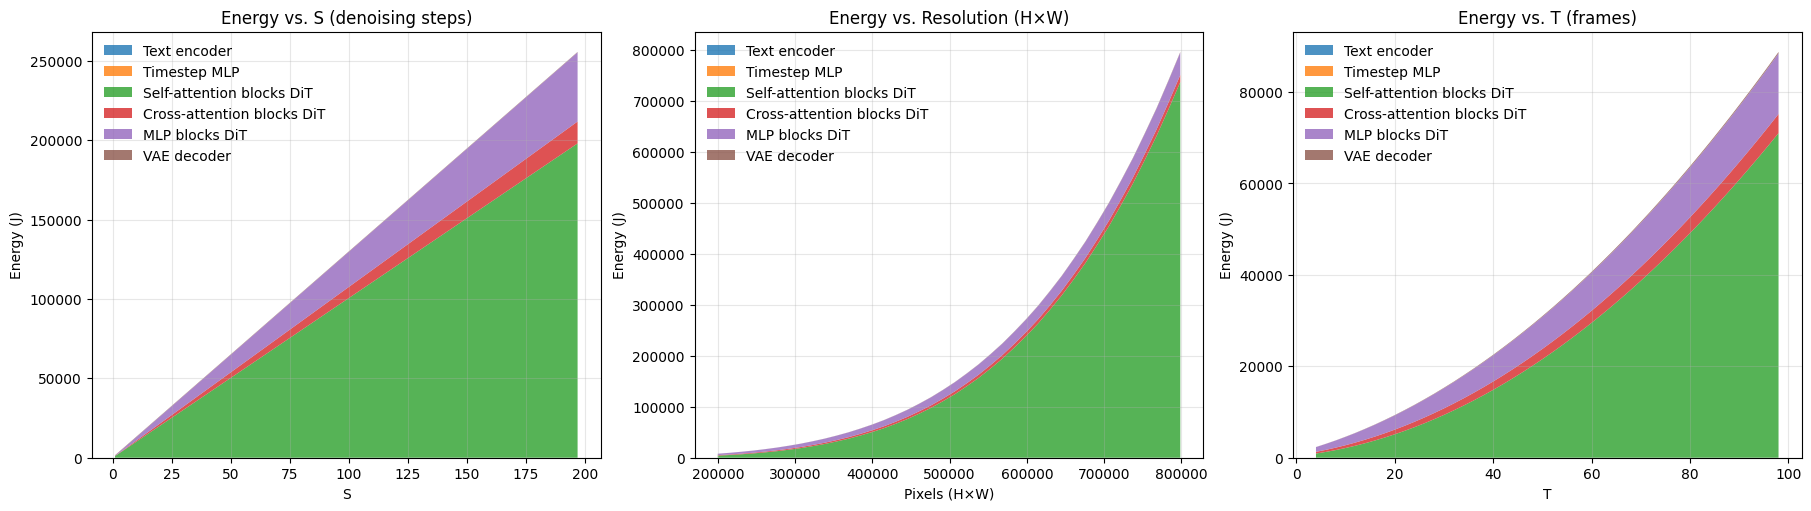

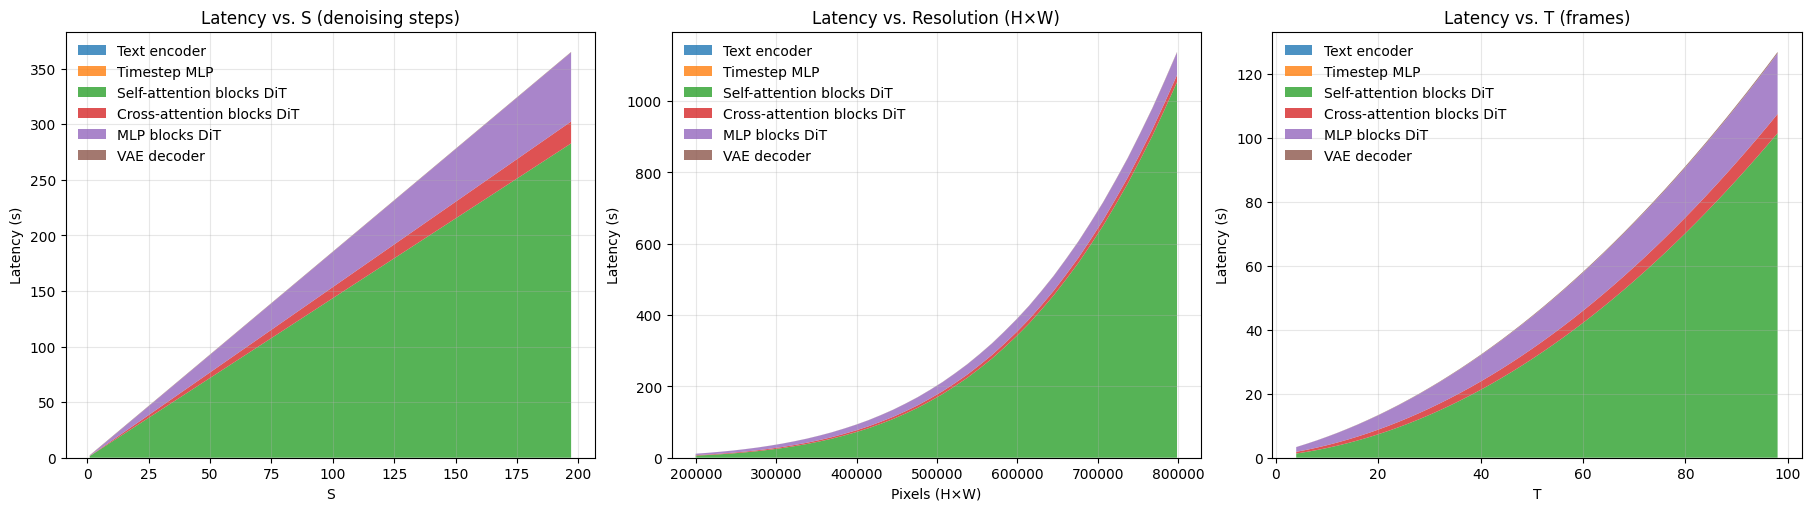

In [ ]:
def conv3d_flops(cin, cout, kt, kh, kw, T, H, W):
    return 2 * kt * kh * kw * cin * cout * T * H * W

def conv2d_flops(cin, cout, kh, kw, T, H, W):
    return 2 * kh * kw * cin * cout * T * H * W

def attn2d_middle_flops(C, T, H, W):
    L = H * W
    toqkv = 2 * C * (3*C) * L
    proj  = 2 * C * C * L
    mat   = 4 * (L * L) * C
    return T * (toqkv + proj + mat)

def wan_vae_flops_exact(T0, H0, W0, z=Z_DIM, d0=BASE):
    T0 = int(T0); H0 = int(H0); W0 = int(W0)
    T1, H1, W1 = T0, math.ceil(H0/2), math.ceil(W0/2)
    T2, H2, W2 = math.ceil(T1/2), math.ceil(H1/2), math.ceil(W1/2)
    T3, H3, W3 = math.ceil(T2/2), math.ceil(H2/2), math.ceil(W2/2)
    Fenc = 0
    Fenc += conv3d_flops(3, d0, 3,3,3, T0,H0,W0)
    Fenc += 4 * conv3d_flops(d0, d0, 3,3,3, T0,H0,W0)
    Fenc += conv2d_flops(d0, d0, 3,3, T0, H1, W1)
    Fenc += conv3d_flops(96,192,3,3,3, T1,H1,W1) \
          + conv3d_flops(192,192,3,3,3, T1,H1,W1) \
          + conv3d_flops(96,192,1,1,1, T1,H1,W1)
    Fenc += 2 * conv3d_flops(192,192,3,3,3, T1,H1,W1)
    Fenc += conv2d_flops(192,192,3,3, T1, H2, W2)
    Fenc += conv3d_flops(192,192,3,1,1, T2, H2, W2)
    Fenc += conv3d_flops(192,384,3,3,3, T2,H2,W2) \
          + conv3d_flops(384,384,3,3,3, T2,H2,W2) \
          + conv3d_flops(192,384,1,1,1, T2,H2,W2)
    Fenc += 2 * conv3d_flops(384,384,3,3,3, T2,H2,W2)
    Fenc += conv2d_flops(384,384,3,3, T2, H3, W3)
    Fenc += conv3d_flops(384,384,3,1,1, T3, H3, W3)
    Fenc += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    Fenc += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    Fenc += attn2d_middle_flops(384, T3, H3, W3)
    Fenc += conv3d_flops(384, 2*z, 3,3,3, T3,H3,W3)

    Fdec = 0
    Fdec += conv3d_flops(z,384,3,3,3, T3,H3,W3)
    Fdec += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    Fdec += attn2d_middle_flops(384, T3, H3, W3)
    Fdec += 3 * 2 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    Fdec += conv3d_flops(384,768,3,1,1, 2*T3, H3, W3)
    Fdec += conv2d_flops(384,192,3,3, 2*T3, 2*H3, 2*W3)

    T35, H2, W2 = 2*T3, 2*H3, 2*W3
    Fdec += conv3d_flops(192,384,3,3,3, T35,H2,W2) \
          + conv3d_flops(384,384,3,3,3, T35,H2,W2) \
          + conv3d_flops(192,384,1,1,1, T35,H2,W2)
    Fdec += 2 * conv3d_flops(384,384,3,3,3, T35,H2,W2)
    Fdec += conv3d_flops(384,768,3,1,1, 4*T3, H2, W2)
    Fdec += conv2d_flops(384,192,3,3, 4*T3, 4*H3, 4*W3)

    T2, H1, W1 = 4*T3, 4*H3, 4*W3
    Fdec += 3 * 2 * conv3d_flops(192,192,3,3,3, T2,H1,W1)
    Fdec += conv2d_flops(192,96,3,3, T2, 8*H3, 8*W3)
    Fdec += conv3d_flops(96,3,3,3,3, T2, 8*H3, 8*W3)

    return Fenc, Fdec

def flops_vae_enc(T, H, W):
    if USE_EXACT_VAE:
        Fenc, _ = wan_vae_flops_exact(T, H, W, z=Z_DIM, d0=BASE)
        return Fenc
    return K_enc * T * H * W

def flops_vae_dec(T, H, W):
    if USE_EXACT_VAE:
        _, Fdec = wan_vae_flops_exact(T, H, W, z=Z_DIM, d0=BASE)
        return Fdec
    return K_dec * T * H * W

def flops_t5_layer(m_text: int, d_text: int, f_ff: int = 4):
    F_attn = 8.0 * m_text * (d_text ** 2) + 4.0 * (m_text ** 2) * d_text
    F_ffn  = 4.0 * f_ff * m_text * (d_text ** 2)
    return F_attn + F_ffn

def flops_text_encoder_total(m_text: int,
                             d_text: int,
                             L_text: int,
                             f_ff: int = 4,
                             passes: int = 2):
    return passes * L_text * flops_t5_layer(m_text, d_text, f_ff)

def flops_timestep_mlp_per_layer(d_model: int,
                                 d_tau: int = d_tau):
    """
    Cost to map a timestep embedding to per-block conditioning.
    """
    return 2 * d_tau * d_model + 14 * d_model**2


def latent_tokens(T, H, W,
                  vae_t=vae_stride_t, vae_s=vae_stride_s,
                  p_h=patch_h, p_w=patch_w):
    return (1.0 + T/float(vae_t)) * (H/(vae_s*p_h)) * (W/(vae_s*p_w))

def flops_dit_per_layer(T, H, W, d, f_mlp=4, m_text=512,
                        vae_t=4, vae_s=8, p_h=2, p_w=2):
    ell = (1.0 + T/float(vae_t)) * (H/(vae_s*p_h)) * (W/(vae_s*p_w))
    F_self = 8.0 * ell * d**2 + 4.0 * (ell**2) * d
    F_cross_step = 4.0 * ell * d**2 + 4.0 * m_text * d**2 + 4.0 * ell * m_text * d
    F_mlp = 4.0 * f_mlp * ell * d**2
    return F_self, F_cross_step, F_mlp

def flops_total_breakdown(T, H, W, S, N, d, f_mlp=4, m_text=512, enc=False,
                          include_text=True,
                          d_text=1024, L_text=24, f_text=4, text_passes=2,
                          include_timestep=True,
                          temb_layers=2, temb_hidden=2,
                          g=g):
    """
    Returns a dict with per-part FLOPs + total.
    New parts:
      - 'text' : text encoder (e.g., T5), typically done once (cond+uncond)
      - 'temb' : timestep MLP per diffusion step per DiT layer
    """
    # --- VAE ---
    F_enc = flops_vae_enc(T, H, W) if enc else 0.0
    F_dec = flops_vae_dec(T, H, W)

    # --- DiT per-layer costs (self/cross/mlp) ---
    F_self_l, F_cross_step_l, F_mlp_l = flops_dit_per_layer(T, H, W, d, f_mlp, m_text)
    F_self  = S * N * g * F_self_l
    F_cross = S * N * g * F_cross_step_l
    F_mlp   = S * N * g * F_mlp_l

    # --- Text encoder (once; usually 2 passes for CFG) ---
    F_text = 0.0
    if include_text:
        F_text = flops_text_encoder_total(m_text=m_text,
                                          d_text=d_text,
                                          L_text=L_text,
                                          f_ff=f_text,
                                          passes=text_passes)

    # --- Timestep MLP (per step per layer) ---
    F_temb = 0.0
    if include_timestep:
        F_temb_per_layer = flops_timestep_mlp_per_layer(d_model=d,
                                                        d_tau=d_tau)
        F_temb = S * N * F_temb_per_layer

    F_total = F_enc + F_self + F_cross + F_mlp + F_dec + F_text + F_temb

    res = {"enc": F_enc} if enc else {}
    res = {
        **res,
        "text": F_text if include_text else 0.0,
        "temb": F_temb if include_timestep else 0.0,
        "self": F_self,
        "cross": F_cross,
        "mlp": F_mlp,
        "dec": F_dec,
        "total": F_total,
    }
    return res


def latency_energy_from_flops(F_total, theta_peak, mu_eff, P_max, lat_over=0.0, en_over=0.0):
    T_s = F_total / (mu_eff * theta_peak) + lat_over
    E_j = P_max * T_s + en_over
    return T_s, E_j

def build_curves_vary_S(S_values, T, H, W, enc=False,
                        include_text=True, include_timestep=True,
                        d_text=1024, L_text=24, f_text=4, text_passes=2,
                        temb_layers=2, temb_hidden=None):
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for S in S_values:
        fb = flops_total_breakdown(
            T, H, W, S, N, d, f_mlp, m_text, enc=enc,
            include_text=include_text, d_text=d_text, L_text=L_text,
            f_text=f_text, text_passes=text_passes,
            include_timestep=include_timestep,
            temb_layers=temb_layers, temb_hidden=temb_hidden
        )
        for p in parts:
            T_s, E_j = latency_energy_from_flops(
                fb[p], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
            )
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(
            fb["total"], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
        )
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

def build_curves_vary_scale(scale_values, T, H0, W0, S, enc=False,
                             include_text=True, include_timestep=True,
                             d_text=1024, L_text=24, f_text=4, text_passes=2,
                             temb_layers=2, temb_hidden=None):
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for s in scale_values:
        H = int(round(H0 * s))
        W = int(round(W0 * s))
        fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
        for p in parts:
            T_s, E_j = latency_energy_from_flops(fb[p], theta_peak, mu_eff, P_max,
                                                 latency_overhead, energy_overhead)
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(fb["total"], theta_peak, mu_eff, P_max,
                                                     latency_overhead, energy_overhead)
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

def build_curves_vary_T(T_values, H, W, S, enc=False,
                        include_text=True, include_timestep=True,
                        d_text=1024, L_text=24, f_text=4, text_passes=2,
                        temb_layers=2, temb_hidden=None):
    """
    Vary T (number of frames) while keeping H,W,S fixed.
    """
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for T in T_values:
        fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
        for p in parts:
            T_s, E_j = latency_energy_from_flops(fb[p], theta_peak, mu_eff, P_max,
                                                 latency_overhead, energy_overhead)
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(fb["total"], theta_peak, mu_eff, P_max,
                                                     latency_overhead, energy_overhead)
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

# =========================
# ======= PLOTS ===========
# =========================
def stacked_area(ax, x, comp_dict, title, xlabel, ylabel, enc=False,
                 include_text=True, include_timestep=True):
    order = []
    if enc: order.append("enc")
    if include_text: order.append("text")
    if include_timestep: order.append("temb")
    order += ["self", "cross", "mlp", "dec"]
    labels = {}
    if enc: labels["enc"] = "VAE encoder"
    if include_text: labels["text"] = "Text encoder"
    if include_timestep: labels["temb"] = "Timestep MLP"
    labels = { **labels,
        "self": "Self-attention blocks DiT",
        "cross": "Cross-attention blocks DiT",
        "mlp": "MLP blocks DiT",
        "dec": "VAE decoder",
    }
    y = [comp_dict[k] for k in order]
    ax.stackplot(x, y, labels=[labels[k] for k in order], alpha=0.8)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3); ax.legend(loc="upper left", frameon=False)

# ---- Build data
T_tot_S, E_tot_S, T_comp_S, E_comp_S = build_curves_vary_S(S_values, T0, H0, W0)
T_tot_sc, E_tot_sc, T_comp_sc, E_comp_sc = build_curves_vary_scale(scale_values, T0, H0, W0, S0)
T_tot_T, E_tot_T, T_comp_T, E_comp_T = build_curves_vary_T(T_values, H0, W0, S0)

# ---- Figure: Energy (3 subplots)
figE, axesE = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
stacked_area(axesE[0], S_values,        E_comp_S,  "Energy vs. S (denoising steps)", "S",          "Energy (J)")
stacked_area(axesE[1], scale_values*(H0*W0), E_comp_sc, "Energy vs. Resolution (H×W)", "Pixels (H×W)", "Energy (J)")
stacked_area(axesE[2], T_values,        E_comp_T,  "Energy vs. T (frames)",          "T",          "Energy (J)")

# ---- Figure: Latency (3 subplots)
figL, axesL = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
stacked_area(axesL[0], S_values,        T_comp_S,  "Latency vs. S (denoising steps)", "S",          "Latency (s)")
stacked_area(axesL[1], scale_values*(H0*W0), T_comp_sc, "Latency vs. Resolution (H×W)", "Pixels (H×W)", "Latency (s)")
stacked_area(axesL[2], T_values,        T_comp_T,  "Latency vs. T (frames)",          "T",          "Latency (s)")

plt.show()


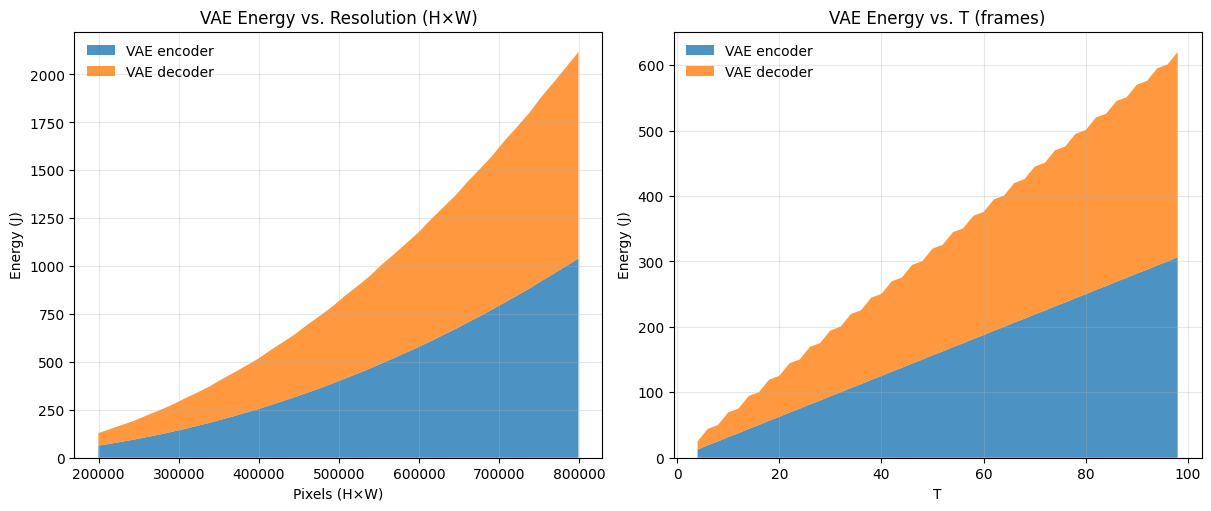

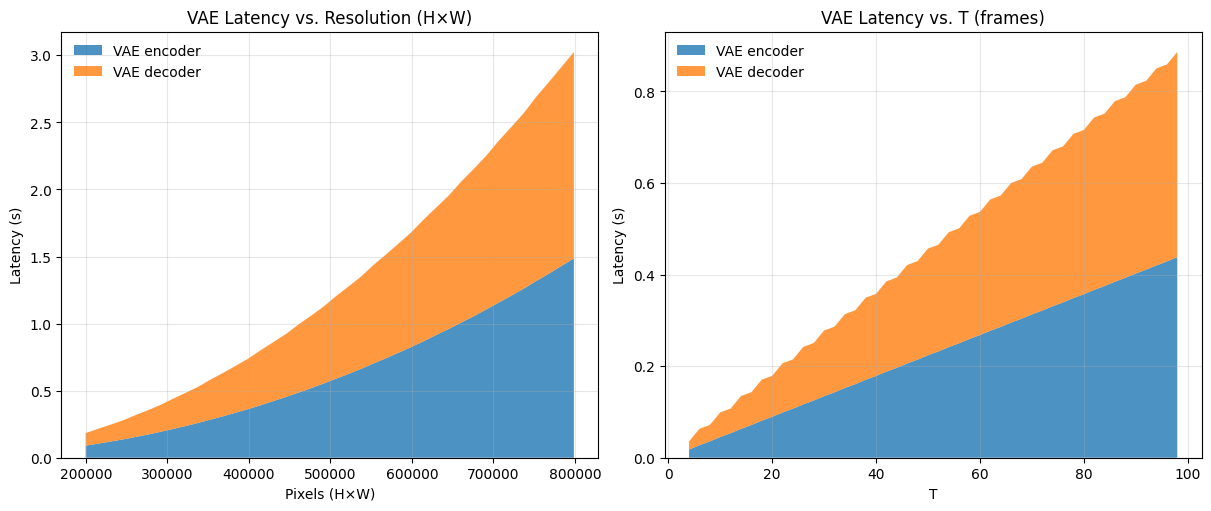

In [25]:
# =========================
# ====== CURVES (VAE) =====
# =========================
def build_curves_vary_scale(scale_values, T, H0, W0):
    E_comp, T_comp = {"enc": [], "dec": []}, {"enc": [], "dec": []}
    E_total, T_total = [], []
    for s in scale_values:
        H = int(round(H0 * s)); W = int(round(W0 * s))
        Fenc, Fdec = wan_vae_flops_exact(T, H, W)
        Ftot = Fenc + Fdec
        for k, F in [("enc", Fenc), ("dec", Fdec)]:
            t, e = latency_energy_from_flops(F, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
            T_comp[k].append(t); E_comp[k].append(e)
        t_tot, e_tot = latency_energy_from_flops(Ftot, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
        T_total.append(t_tot); E_total.append(e_tot)
    return (np.array(T_total), np.array(E_total),
            {k: np.array(v) for k,v in T_comp.items()},
            {k: np.array(v) for k,v in E_comp.items()})

def build_curves_vary_T(T_values, H, W):
    E_comp, T_comp = {"enc": [], "dec": []}, {"enc": [], "dec": []}
    E_total, T_total = [], []
    for T in T_values:
        Fenc, Fdec = wan_vae_flops_exact(T, H, W)
        Ftot = Fenc + Fdec
        for k, F in [("enc", Fenc), ("dec", Fdec)]:
            t, e = latency_energy_from_flops(F, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
            T_comp[k].append(t); E_comp[k].append(e)
        t_tot, e_tot = latency_energy_from_flops(Ftot, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
        T_total.append(t_tot); E_total.append(e_tot)
    return (np.array(T_total), np.array(E_total),
            {k: np.array(v) for k,v in T_comp.items()},
            {k: np.array(v) for k,v in E_comp.items()})

# =========================
# ======= PLOTS ===========
# =========================
def stacked_area(ax, x, comp_dict, title, xlabel, ylabel):
    order = ["enc", "dec"]
    labels = {"enc": "VAE encoder", "dec": "VAE decoder"}
    y = [comp_dict[k] for k in order]
    ax.stackplot(x, y, labels=[labels[k] for k in order], alpha=0.8)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3); ax.legend(loc="upper left", frameon=False)

# ---- Build data (VAE only)
T_tot_sc, E_tot_sc, T_comp_sc, E_comp_sc = build_curves_vary_scale(scale_values, T0, H0, W0)
T_tot_T,  E_tot_T,  T_comp_T,  E_comp_T  = build_curves_vary_T(T_values, H0, W0)

# ---- Figure: Energy (2 subplots)
figE, axesE = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
stacked_area(
    axesE[0],
    scale_values*(H0*W0),
    E_comp_sc,
    title="VAE Energy vs. Resolution (H×W)",
    xlabel="Pixels (H×W)",
    ylabel="Energy (J)"
)
stacked_area(
    axesE[1],
    T_values,
    E_comp_T,
    title="VAE Energy vs. T (frames)",
    xlabel="T",
    ylabel="Energy (J)"
)

# ---- Figure: Latency (2 subplots)
figL, axesL = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
stacked_area(
    axesL[0],
    scale_values*(H0*W0),
    T_comp_sc,
    title="VAE Latency vs. Resolution (H×W)",
    xlabel="Pixels (H×W)",
    ylabel="Latency (s)"
)
stacked_area(
    axesL[1],
    T_values,
    T_comp_T,
    title="VAE Latency vs. T (frames)",
    xlabel="T",
    ylabel="Latency (s)"
)

plt.show()


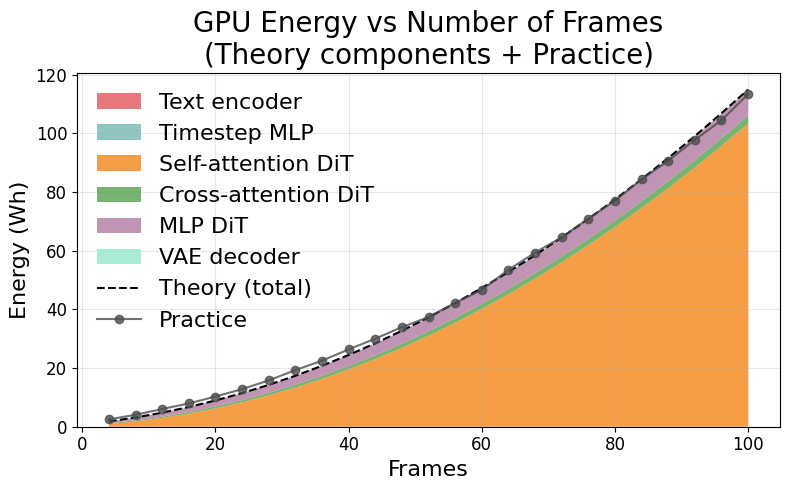

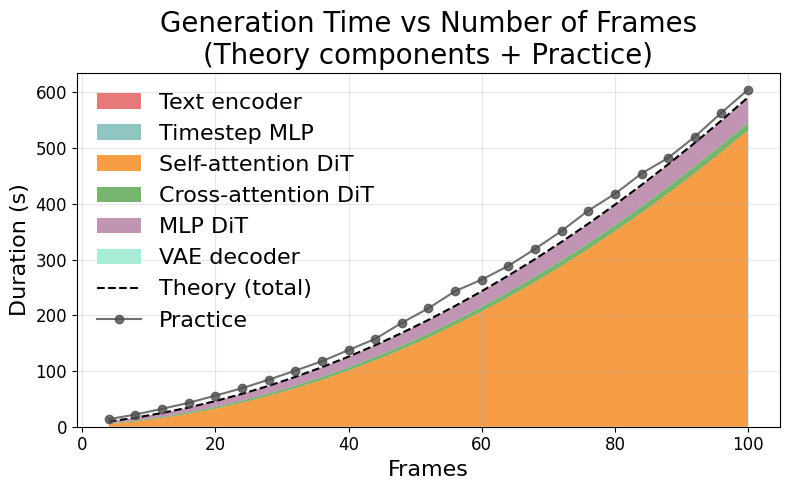

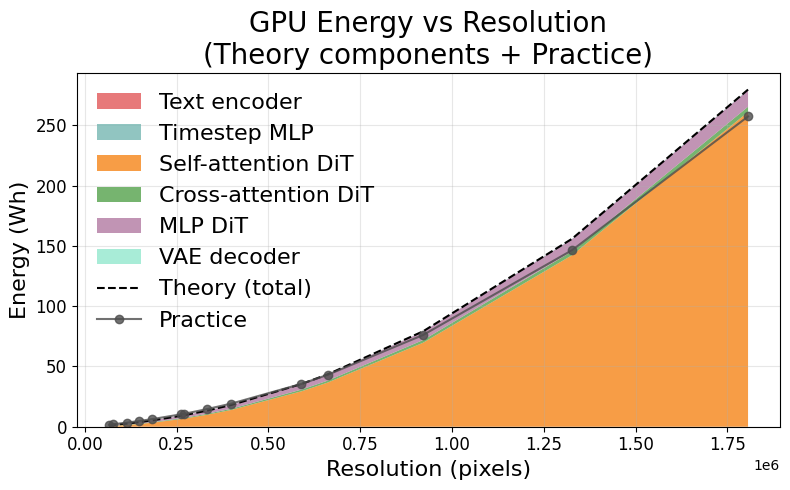

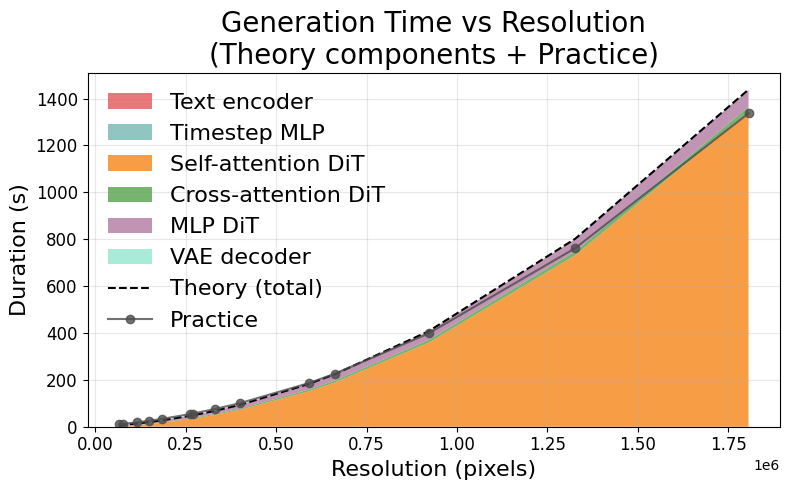

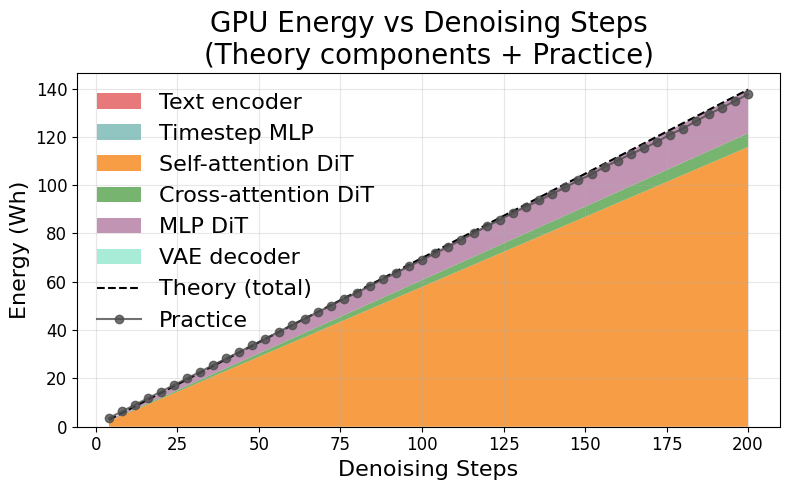

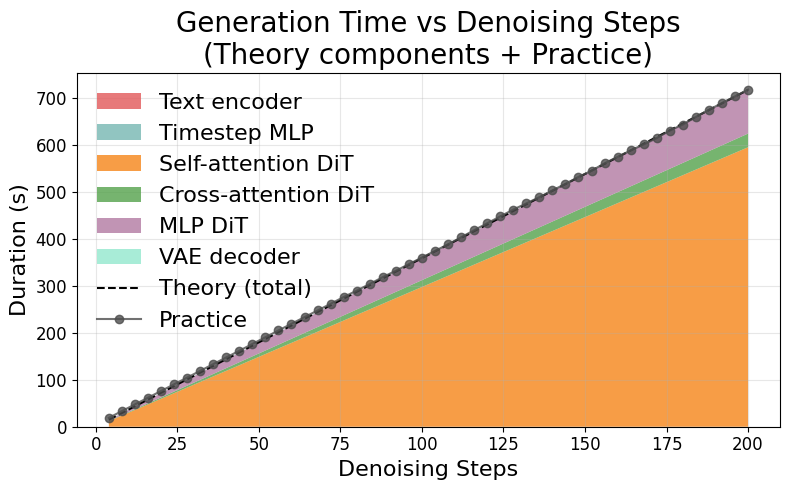

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

OBS_ENERGY_TO_WH = 1000.0

COMP_ORDER = ["text", "temb", "self", "cross", "mlp", "dec"]
COMP_LABELS = {
    "text": "Text encoder",
    "temb": "Timestep MLP",
    "self": "Self-attention DiT",
    "cross":"Cross-attention DiT",
    "mlp":  "MLP DiT",
    "dec":  "VAE decoder",
}

COMP_COLORS = {
    "text": "#E15759",  # red
    "temb": "#76B7B2",  # teal
    "self": "#F58518",  # orange
    "cross":"#54A24B",  # green
    "mlp":  "#B279A2",  # purple
    "dec": "#93E8CD",  # pink
}

def theory_components_wh_s(T, H, W, S):
    """
    Return component-wise theory for a single config:
    - energy (Wh) dict per component
    - duration (s)   dict per component
    Also returns totals.
    """
    fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
    e_wh, t_s = {}, {}
    for k in COMP_ORDER:
        t, e = latency_energy_from_flops(
            fb[k], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
        )
        e_wh[k] = e / 3600.0
        t_s[k]  = t
    return e_wh, t_s, sum(e_wh.values()), sum(t_s.values())
def build_series(df, x_col, w_col, h_col, t_col, s_col):
    """
    For each row of df, compute component-wise theory (Wh and s) and collect practice series.
    Returns:
      x_values
      energy_comp: dict of np.arrays per component
      time_comp:   dict of np.arrays per component
      energy_obs:  np.array
      time_obs:    np.array
      energy_tot_theory: np.array
      time_tot_theory:   np.array
    """
    xs = df[x_col].to_numpy()
    e_comp = {k: [] for k in COMP_ORDER}
    t_comp = {k: [] for k in COMP_ORDER}
    e_tot, t_tot = [], []

    for _, r in df.iterrows():
        e_wh_dict, t_s_dict, e_total, t_total = theory_components_wh_s(
            int(r[t_col]), int(r[h_col]), int(r[w_col]), int(r[s_col])
        )
        for k in COMP_ORDER:
            e_comp[k].append(e_wh_dict[k])
            t_comp[k].append(t_s_dict[k])
        e_tot.append(e_total)
        t_tot.append(t_total)

    for k in COMP_ORDER:
        e_comp[k] = np.array(e_comp[k])
        t_comp[k] = np.array(t_comp[k])

    e_tot = np.array(e_tot)
    t_tot = np.array(t_tot)

    e_obs = df['energy_generate_gpu'].to_numpy() * OBS_ENERGY_TO_WH
    t_obs = df['duration_generate'].to_numpy()

    return xs, e_comp, t_comp, e_obs, t_obs, e_tot, t_tot


def stacked_theory_with_practice(ax, x, comp_dict, obs, title, xlabel, ylabel, show_total_outline=True):
    ys = [comp_dict[k] for k in COMP_ORDER]
    labels = [COMP_LABELS[k] for k in COMP_ORDER]
    colors = [COMP_COLORS[k] for k in COMP_ORDER]
    ax.stackplot(x, ys, labels=labels, colors=colors, alpha=0.8, linewidth=0.5)

    if show_total_outline:
        total_theory = np.sum(np.vstack(ys), axis=0)
        ax.plot(x, total_theory, color="black", linestyle="--", linewidth=1.5, label="Theory (total)")

    ax.plot(x, obs, color="#4d4d4d", marker="o", linestyle="-", linewidth=1.5,
            label="Practice", alpha=0.8)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.legend(loc="upper left", frameon=False, fontsize=16)

    ax.grid(True, alpha=0.3)


# =========================
# A) Experiment 7 — vary number of frames
# =========================
df7 = exp7_df[exp7_df['num_frames'] % 4 == 0].copy()
if 'width'  not in df7.columns:  df7['width']  = W0
if 'height' not in df7.columns:  df7['height'] = H0
if 'steps'  not in df7.columns:  df7['steps']  = S0
df7 = df7.sort_values(by='num_frames')

x7, e_comp7, t_comp7, e_obs7, t_obs7, e_tot7, t_tot7 = build_series(
    df7, x_col='num_frames', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x7, e_comp7, e_obs7,
    title="GPU Energy vs Number of Frames\n(Theory components + Practice)",
    xlabel="Frames", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_frames.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x7, t_comp7, t_obs7,
    title="Generation Time vs Number of Frames\n(Theory components + Practice)",
    xlabel="Frames", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_frames.png", dpi=300)
plt.tight_layout(); plt.show()

# =========================
# B) Experiment 8 — vary resolution
# =========================
df8 = exp8_df.copy()
if 'num_frames' not in df8.columns: df8['num_frames'] = T0
if 'steps'      not in df8.columns: df8['steps']      = S0
df8['resolution'] = df8['width'] * df8['height']
df8 = df8.sort_values(by='resolution')

x8, e_comp8, t_comp8, e_obs8, t_obs8, e_tot8, t_tot8 = build_series(
    df8, x_col='resolution', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x8, e_comp8, e_obs8,
    title="GPU Energy vs Resolution\n(Theory components + Practice)",
    xlabel="Resolution (pixels)", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_resolution.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x8, t_comp8, t_obs8,
    title="Generation Time vs Resolution\n(Theory components + Practice)",
    xlabel="Resolution (pixels)", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_resolution.png", dpi=300)
plt.tight_layout(); plt.show()

# =========================
# C) Experiment 9 — vary denoising steps
# =========================
df9 = exp9_df.copy()
if 'width'      not in df9.columns: df9['width']      = W0
if 'height'     not in df9.columns: df9['height']     = H0
if 'num_frames' not in df9.columns: df9['num_frames'] = T0

df9 = df9[df9['steps'] % 4 == 0].copy()
df9 = df9.sort_values(by='steps')

x9, e_comp9, t_comp9, e_obs9, t_obs9, e_tot9, t_tot9 = build_series(
    df9, x_col='steps', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x9, e_comp9, e_obs9,
    title="GPU Energy vs Denoising Steps\n(Theory components + Practice)",
    xlabel="Denoising Steps", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_steps.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x9, t_comp9, t_obs9,
    title="Generation Time vs Denoising Steps\n(Theory components + Practice)",
    xlabel="Denoising Steps", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_steps.png", dpi=300)
plt.tight_layout(); plt.show()



In [29]:
def mean_percentage_error(y_true, y_pred):
    """
    Mean Absolute Percentage Error (MAPE)
    Inputs in same unit (e.g. Wh or seconds)
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Ex pour exp7 (frames)
mape_energy_frames = mean_percentage_error(e_obs7, e_tot7)
mape_time_frames   = mean_percentage_error(t_obs7, t_tot7)

# exp8 (resolution)
mape_energy_res = mean_percentage_error(e_obs8, e_tot8)
mape_time_res   = mean_percentage_error(t_obs8, t_tot8)

# exp9 (steps)
mape_energy_steps = mean_percentage_error(e_obs9, e_tot9)
mape_time_steps   = mean_percentage_error(t_obs9, t_tot9)

print("Frames:  Energy {:.2f}%, Latency {:.2f}%".format(mape_energy_frames, mape_time_frames))
print("Res:     Energy {:.2f}%, Latency {:.2f}%".format(mape_energy_res, mape_time_res))
print("Steps:   Energy {:.2f}%, Latency {:.2f}%".format(mape_energy_steps, mape_time_steps))


Frames:  Energy 6.60%, Latency 10.45%
Res:     Energy 11.60%, Latency 14.01%
Steps:   Energy 1.90%, Latency 1.90%


In [ ]:
import numpy as np

def estimate_mu_and_overhead_from_dfs(dfs, theta_peak, build_args):
    F_list, T_list = [], []
    for df in dfs:
        for _, r in df.iterrows():
            fb = flops_total_breakdown(
                int(r['num_frames']), int(r['height']), int(r['width']),
                int(r['steps']),
                build_args['N'], build_args['d'], build_args['f_mlp'],
                build_args['m_text']
            )
            F_list.append(fb['total'])
            T_list.append(float(r['duration_generate']))
    F = np.asarray(F_list)
    T = np.asarray(T_list)

    X = np.column_stack([F, np.ones_like(F)])
    coeff, _, _, _ = np.linalg.lstsq(X, T, rcond=None)
    a_hat, b_hat = coeff[0], coeff[1]

    # mu = 1 / (a * theta_peak)
    mu_hat = 1.0 / (a_hat * theta_peak)

    # R^2
    T_pred = a_hat * F + b_hat
    ss_res = np.sum((T - T_pred)**2)
    ss_tot = np.sum((T - np.mean(T))**2)
    R2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else np.nan

    mu_hat = float(np.clip(mu_hat, 1e-3, 1.0))
    return mu_hat, float(b_hat), float(R2)

build_args = dict(N=N, d=d, f_mlp=f_mlp, m_text=m_text)
mu_hat, b_hat, R2 = estimate_mu_and_overhead_from_dfs([exp7_df, exp8_df, exp9_df], theta_peak, build_args)
print(f"mu={mu_hat:.3f}, latency_overhead={b_hat:.3f}s, R2={R2:.4f}")


mu=0.456, latency_overhead=0.000s, R2=0.9984
